> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: What if the patient comes to the appointment?
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: If a patient were to come to an appointment, what kind of person would he or she be? What kind of people would not come? In this report, we will examine personal characteristics such as gender and underlying medical conditions and whether they come to appointments. If they do come, we will look at prior communication such as SMS and whether they come to the appointment or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#  types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Memo
No column with null value

In [3]:
# View of data set
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# After discussing the structure of the data and any problems that need to be
#  cleaned, perform those cleaning steps in the second part of this section.
# For this data set drop ID such as AppointmentID ,PatientId.
df.drop(['PatientId','Neighbourhood','AppointmentID'], axis=1, inplace=True)

In [5]:
# Check dropped ID such as AppointmentID ,PatientId.
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [6]:
# Data values
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Note 
> SMS received mean is 0.32

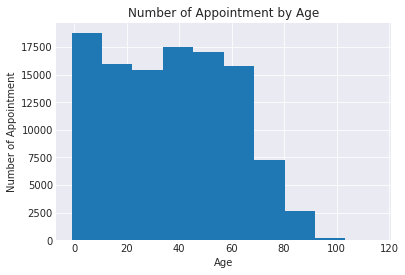

In [7]:
# Show histgram
df.Age.hist()
plt.title ('Number of Appointment by Age')
plt.xlabel('Age')
plt.ylabel('Number of Appointment');

## Chart Description
>To get an overview of the distribution of age in relation to the number of appointments, we created a histogram, which shows that appointments are mostly made by people in their under 20s and 30s.

In [8]:
# For data set condition 
male = df['Gender']=='M'
female = df['Gender']=='F'
show = df['No-show']=='No'
no = df['No-show']=='Yes'
S0= df['Scholarship']==0
S1= df['Scholarship']==1
H0= df['Hipertension']==0
H1= df['Hipertension']==1
D0= df['Diabetes']==0
D1= df['Diabetes']==1
A0= df['Alcoholism']==0
A1= df['Alcoholism']==1
H0= df['Handcap']==0
H1= df['Handcap']==1
SMS0= df['SMS_received']==0
SMS1= df['SMS_received']==1

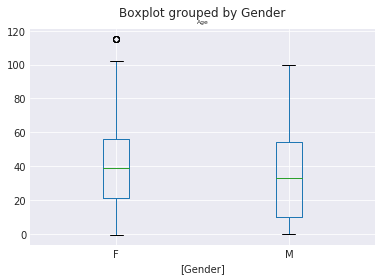

In [9]:
# figure related code
df.boxplot(column=['Age'], by=['Gender']).title.set_size(6);

## Chart Description
>In order to see the distribution of age, a box-and-whisker diagram was created for each gender.<br> It can be seen that the average age of males is younger than that of females.<br> The first quartile shows that women are in their 20s, but men are in their under 20s.

In [10]:
# Statistical Summary
df.groupby(['Gender'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,71840.0,38.893987,22.155235,-1.0,21.0,39.0,56.0,115.0
M,38687.0,33.736863,24.435221,0.0,10.0,33.0,54.0,100.0


## Preparation for Data Analysis
### Data set feature: 
>  Category:  Gender ,Show or No-show(show or not show) <br>
 Number: Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received 
### Summary of data overview
> The age distribution for the number of appointments shows a gender difference.<br>
From the histogram, SMS also has almost 30% of the number of SMS to the number of reservations, <br>
but the others have a small number of characteristics.

### Steps in the analysis
> Analyze whether or not people come for reservations against SMS by gender.<br>
Factors other than SMS will be analyzed for men and women together.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 :Female who receive SMS about appointments, can they attend the appointments?

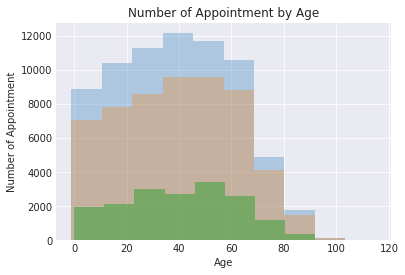

In [11]:
# Female overview by age
df[female].Age.hist(alpha=0.3,label="Female")
df[female & show].Age.hist(alpha=0.3,label="Female")
df[female & show & SMS1 ].Age.hist(alpha=0.5,label="Female")
plt.title ( 'Number of Appointment by Age')
plt.xlabel('Age')
plt.ylabel('Number of Appointment');

## Chart Description
>To see if women would show up for appointments, we created a histogram. The total number of  is blue, the number of women who showed up for an appointment is light orange, and the number who showed up for an appointment and received an SMS is green. Since it is not possible to tell from the distribution alone, we graphed the mean values.

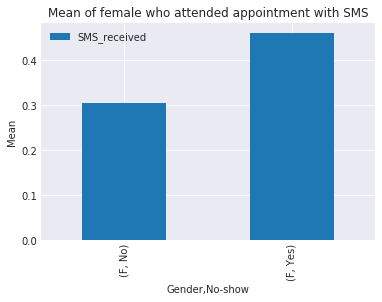

In [12]:
# Mean of female who attended appointment with SMS
df[female].groupby(['Gender','No-show'])[['SMS_received']].mean().plot(kind='bar',title='Mean of female who attended appointment with SMS').set_ylabel('Mean');

## Chart Description
>The average shows that those who did not show up received more SMS than those who did.

In [13]:
# Total count of female who attended appointment with SMS
df[female & no & SMS1 ].Age.count()

6720

### Research Question 2 : Male who receive SMS about appointments, can they attend the appointments?

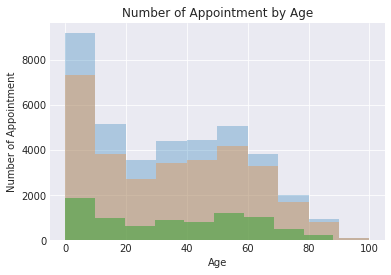

In [15]:
df[male].Age.hist(alpha=0.3,label="Male")
df[male & show].Age.hist(alpha=0.3,label="Male")
df[male & show & SMS1 ].Age.hist(alpha=0.5,label="Male")
plt.title ( 'Number of Appointment by Age')
plt.xlabel('Age')
plt.ylabel('Number of Appointment');

## Chart Description
>To see if males show up for appointments, a histogram was created. The number of appointments for all males is blue, the number of males that showed up for appointments is light orange, and the number that showed up for appointments and received an SMS is green. Since it is not possible to tell from the distribution alone, we graphed the mean values.

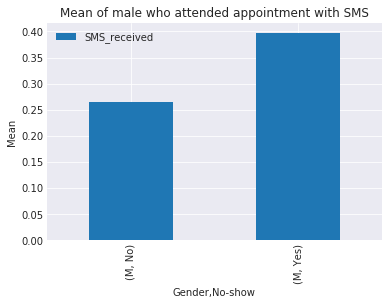

In [14]:
# Mean of male who attended appointment with SMS
df[male].groupby(['Gender','No-show'])[['SMS_received']].mean().plot(kind='bar',title='Mean of male who attended appointment with SMS').set_ylabel('Mean');

## Chart Description
>The average shows that those who did not show up received more SMS than those who did.

In [17]:
# Total count of male who attended appointment with SMS
df[male & no & SMS1 ].Age.count()

3064

### Research Question 3 : Are there any gender who does not show up ?

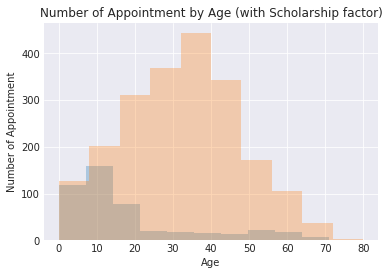

In [18]:
# Number of Appointment by Age (with Scholarship factor)
df[male & no & S1].Age.hist(alpha=0.3,label='Scholarship')
df[female & no & S1].Age.hist(alpha=0.3,label='Scholarship')
plt.title ( 'Number of Appointment by Age (with Scholarship factor)')
plt.xlabel('Age')
plt.ylabel('Number of Appointment');

## Chart Description
>Females who receive scholarships tend not to show up for appointments as much as males. The detailed statistics are shown in the table below. Females who receive scholarships are more than twice as likely as males to not show up for appointments when compared to the average.

In [19]:
# Statiscal summary (with Scholarship factor)
df.groupby(['Gender','No-show'])[['Age','Scholarship']].describe()

Age                                                      \
                  count       mean        std  min   25%   50%   75%    max   
Gender No-show                                                                
F      No       57246.0  39.590417  22.342862 -1.0  22.0  40.0  57.0  115.0   
       Yes      14594.0  36.162190  21.184209  0.0  20.0  34.0  52.0  115.0   
M      No       30962.0  34.461372  24.734056  0.0  10.0  34.0  55.0  100.0   
       Yes       7725.0  30.833010  22.972200  0.0  10.0  28.0  49.0   97.0   

               Scholarship                                               
                     count      mean       std  min  25%  50%  75%  max  
Gender No-show                                                           
F      No          57246.0  0.117860  0.322445  0.0  0.0  0.0  0.0  1.0  
       Yes         14594.0  0.144306  0.351412  0.0  0.0  0.0  0.0  1.0  
M      No          30962.0  0.049609  0.217140  0.0  0.0  0.0  0.0  1.0  
       Yes          7725.0  0.061100  0.239530  0.0  0.0  0.0  0.0  1.0

In [20]:
# Total count of number who attended appointment with Scholarship
df[no & S1 ].Age.count()

2578

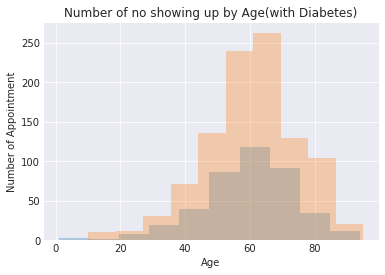

In [21]:
# Number of Appointment by Age (with Diabetes factor)
df[male & no & D1].Age.hist(alpha=0.3,label="Diabetes")
df[female & no & D1].Age.hist(alpha=0.3,label="Diabetes")
plt.title ( 'Number of no showing up by Age(with Diabetes)')
plt.xlabel('Age')
plt.ylabel('Number of Appointment');

## Chart Description
>There is a tendency for females with diabetes to not show up for appointments as much as males. The detailed statistics are shown in the table below. However, the standard deviation does not show a clear difference.

In [22]:
# Statiscal summary (with Diabetes factor)
df.groupby(['Gender','No-show'])[['Age','Diabetes']].describe()

Age                                                      \
                  count       mean        std  min   25%   50%   75%    max   
Gender No-show                                                                
F      No       57246.0  39.590417  22.342862 -1.0  22.0  40.0  57.0  115.0   
       Yes      14594.0  36.162190  21.184209  0.0  20.0  34.0  52.0  115.0   
M      No       30962.0  34.461372  24.734056  0.0  10.0  34.0  55.0  100.0   
       Yes       7725.0  30.833010  22.972200  0.0  10.0  28.0  49.0   97.0   

               Diabetes                                               
                  count      mean       std  min  25%  50%  75%  max  
Gender No-show                                                        
F      No       57246.0  0.080163  0.271547  0.0  0.0  0.0  0.0  1.0  
       Yes      14594.0  0.069686  0.254626  0.0  0.0  0.0  0.0  1.0  
M      No       30962.0  0.062141  0.241415  0.0  0.0  0.0  0.0  1.0  
       Yes       7725.0  0.053463  0.224969  0.0  0.0  0.0  0.0  1.0

In [23]:
# Total count of number who attended appointment with Diabetes
df[no & D1 ].Age.count()

1430

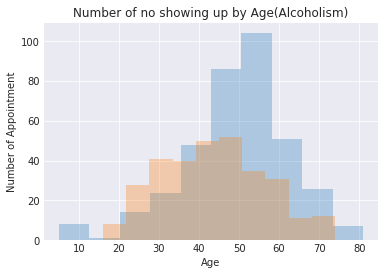

In [24]:
# Number of Appointment by Age (with Alcoholism factor)
df[male & no & A1].Age.hist(alpha=0.3,label="Alcoholism")
df[female & no & A1].Age.hist(alpha=0.3,label="Alcoholism")
plt.title ( 'Number of no showing up by Age(Alcoholism)')
plt.xlabel('Age')
plt.ylabel('Number of Appointment');

## Chart Description
>There is a tendency for males suffering from alcoholism to not show up for appointments as much as females. The detailed statistics are shown in the table below. Comparing the means, males are more than twice as large as females.

In [25]:
# Statiscal summary (with Alcoholism factor)
df.groupby(['Gender','No-show'])[['Age','Alcoholism']].describe()

Age                                                      \
                  count       mean        std  min   25%   50%   75%    max   
Gender No-show                                                                
F      No       57246.0  39.590417  22.342862 -1.0  22.0  40.0  57.0  115.0   
       Yes      14594.0  36.162190  21.184209  0.0  20.0  34.0  52.0  115.0   
M      No       30962.0  34.461372  24.734056  0.0  10.0  34.0  55.0  100.0   
       Yes       7725.0  30.833010  22.972200  0.0  10.0  28.0  49.0   97.0   

               Alcoholism                                               
                    count      mean       std  min  25%  50%  75%  max  
Gender No-show                                                          
F      No         57246.0  0.015984  0.125413  0.0  0.0  0.0  0.0  1.0  
       Yes        14594.0  0.021105  0.143738  0.0  0.0  0.0  0.0  1.0  
M      No         30962.0  0.057102  0.232042  0.0  0.0  0.0  0.0  1.0  
       Yes         7725.0  0.047767  0.213287  0.0  0.0  0.0  0.0  1.0

In [26]:
# Total count of number who attended appointment with Alcoholism
df[no & A1 ].Age.count()

677

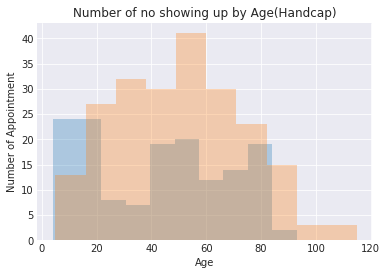

In [27]:
# Number of Appointment by Age (with Handcap factor)
df[male & no & H1].Age.hist(alpha=0.3,label="Handcap")
df[female & no & H1].Age.hist(alpha=0.3,label="Handcap")
plt.title ( 'Number of no showing up by Age(Handcap)')
plt.xlabel('Age')
plt.ylabel('Number of Appointment');

## Chart Description
>There is a tendency for males with handicaps to not show up for appointments as much as females. The detailed statistics are shown in the table below. Comparing the averages, males are about 1.5 times larger than females.

In [28]:
# Statiscal summary (with Handcap factor)
df.groupby(['Gender','No-show'])[['Age','Handcap']].describe()

Age                                                      \
                  count       mean        std  min   25%   50%   75%    max   
Gender No-show                                                                
F      No       57246.0  39.590417  22.342862 -1.0  22.0  40.0  57.0  115.0   
       Yes      14594.0  36.162190  21.184209  0.0  20.0  34.0  52.0  115.0   
M      No       30962.0  34.461372  24.734056  0.0  10.0  34.0  55.0  100.0   
       Yes       7725.0  30.833010  22.972200  0.0  10.0  28.0  49.0   97.0   

                Handcap                                               
                  count      mean       std  min  25%  50%  75%  max  
Gender No-show                                                        
F      No       57246.0  0.019792  0.150033  0.0  0.0  0.0  0.0  3.0  
       Yes      14594.0  0.018569  0.149914  0.0  0.0  0.0  0.0  4.0  
M      No       30962.0  0.028196  0.183839  0.0  0.0  0.0  0.0  4.0  
       Yes       7725.0  0.023560  0.168658  0.0  0.0  0.0  0.0  3.0

In [94]:
# Total count of number who attended appointment with Alcoholism
df[no & H1 ].Age.count()

366

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Data Overview
> The total number of data is 110527 and the number of males who did not come to the appointment is 22319. The number of females  who did not show up for appointments was 14594, and the number of males who did not show up for appointments was 7725. The number of females who did not come to the appointment was 14594, and the number of males who did not come to the appointment was 7725.

### Data about Receiving SMS
> The number of women who received the SMS and did not show up for the appointment was 6720, and the number of men was 3064, for a total of 9784. 
### Conclusion about Receiving SMS
> Additional research is needed, such as statistical testing to see if SMS reception is effective.
<br>
### Data about Receiving scholarships
> The total number of cases of scholarship recipients who did not show up for appointments was 2578. 
### Conclusion about Receiving scholarships
>There were differences between men and women in this data, but this may be due to bias in the data itself. It is necessary to conduct a survey using data without bias in the data itself.
<br>

### Data about having diabetes
>The total number of cases of people with diabetes who did not show up for appointments was 1430. 
### Conclusion about having diabetes
>There were differences between men and women in this data, but this may be due to bias in the data itself. It is necessary to conduct a survey using data without bias in the data itself.
<br>
### Data about having alcoholics
>There were 677 cases of alcoholics who did not show up for appointments. 
### Conclusion about having alcoholics
>There were some differences between men and women in this data, but this is different from the bias in the data itself. We think it is necessary to increase the number of data and investigate whether similar results can be obtained.
<br>

### Data about having handicaps
>366 cases of people with handicaps who did not show up for appointments.
### Conclusion about having handicaps
>There were some differences between men and women in this data, but this is different from the bias in the data itself. We think it is necessary to increase the number of data and investigate whether similar results can be obtained.
<br>

### Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0